# Lab 5

In [67]:
import torch
import torchvision
import matplotlib.pyplot as plot


#### Seed

In [68]:
torch.manual_seed(42)

#### Hyperparameters

In [69]:
LEARNING_RATE = 0.01
BATCH_SIZE = 128
HIDDEN_LAYERS = 2
WIDTH = 128
ACT_FUNCTION = torch.nn.Sigmoid()
EPOCHS = 20


#### Datasets

In [70]:
dataset = torchvision.datasets.FashionMNIST(root='./data', download=True, transform=torchvision.transforms.ToTensor())
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [50000, 10000])


#### Dataloaders

In [71]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


#### Model architecture

In [72]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, output_size, num_hidden_layers, width, activation_function):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        if num_hidden_layers == 0:
            self.layers.append(torch.nn.Linear(input_size, output_size))
        else:
            self.layers.append(torch.nn.Linear(input_size, width))
            for _ in range(num_hidden_layers - 1):
                self.layers.append(torch.nn.Linear(width, width))
            self.layers.append(torch.nn.Linear(width, output_size))
        self.activation_function = activation_function

    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers[:-1]:
            x = self.activation_function(layer(x))
        x = self.layers[-1](x)
        return x


In [73]:
model = MLP(784, 10, HIDDEN_LAYERS, WIDTH, ACT_FUNCTION)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)


#### Training function

In [74]:
def training(model, train_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    accuracy = 100.0 * correct / total
    return train_loss, accuracy


#### Evaluation function

In [75]:
def evaluation(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    val_loss = val_loss / len(val_loader.dataset)
    accuracy = 100.0 * correct / total
    return val_loss, accuracy


In [76]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_accuracy = training(model, train_loader, criterion, optimizer)
    val_loss, val_accuracy = evaluation(model, val_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")


Epoch 1, Train Loss: 2.3021, Train Accuracy: 11.03%, Val Loss: 2.2991, Val Accuracy: 20.85%


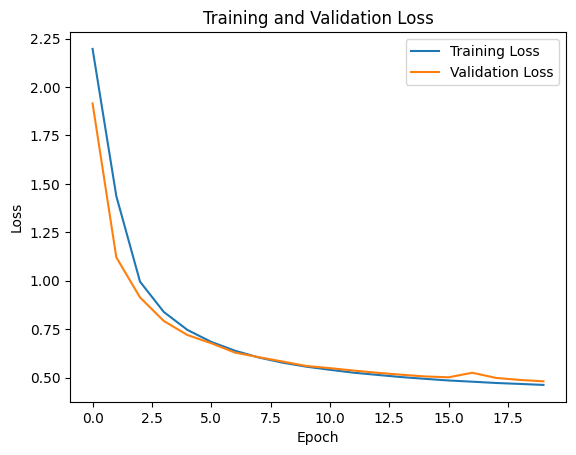

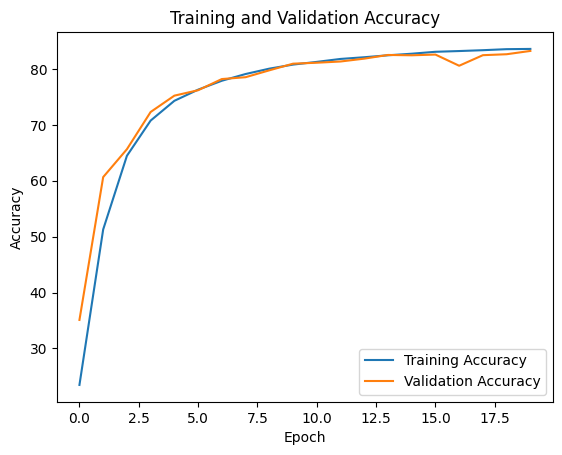

In [ ]:
plot.figure()
plot.title("Training and Validation Loss")
plot.plot(train_losses, label="Training Loss")
plot.plot(val_losses, label="Validation Loss")
plot.xlabel("Epoch")
plot.ylabel("Loss")
plot.legend()
plot.show()

plot.figure()
plot.title("Training and Validation Accuracy")
plot.plot(train_accuracies, label="Training Accuracy")
plot.plot(val_accuracies, label="Validation Accuracy")
plot.xlabel("Epoch")
plot.ylabel("Accuracy")
plot.legend()
plot.show()
